In [46]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import math
import torch
import torch.nn as nn

In [47]:
df = pd.read_excel('Real_estate_valuation_data_set.xlsx'); 
data = np.array(df)

In [48]:
X = data[:,2:6] # Features
y = data[:,-1] # labels/targets

# split the dataet into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# split the training dataset further to get the validation dataset
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42)

In [49]:
X_train_tensor = torch.tensor(X_train, dtype = torch.float32)

In [50]:
y_train_tensor = torch.tensor(y_train)

In [51]:
X_train_tensor.shape

torch.Size([334, 4])

In [52]:
class FFNN(nn.Module):
    
    def __init__(self):
        
        super(FFNN, self).__init__()
        
        self.linear1 = nn.Linear(4,3)
        self.relu=nn.ReLU()
        self.linear2 = nn.Linear(3,1)

        torch.nn.init.normal_(self.linear1.weight,mean=0.0, std=math.sqrt(2/4))
        torch.nn.init.normal_(self.linear2.weight,mean=0.0,std=math.sqrt(1/3))
        torch.nn.init.constant_(self.linear1.bias,0.1)
        torch.nn.init.constant_(self.linear2.bias,0.2)

    def forward(self,x):
        h=self.linear1(x)
        v=self.relu(h)
        yhat=self.linear2(v)
        return yhat

In [53]:
ffnn = FFNN()

In [119]:
yHat = ffnn(X_train_tensor)

print(yHat.shape)

torch.Size([334, 1])


In [55]:
L=nn.L1Loss()
loss=L(y_train_tensor,yHat)

D:\program\Anaconda\lib\site-packages\torch\nn\modules\loss.py:96: UserWarning: Using a target size (torch.Size([334, 1])) that is different to the input size (torch.Size([334])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


In [56]:
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim

In [76]:
optimizer=optim.SGD(ffnn.parameters(),lr=0.001)

In [77]:
class RealEstate(Dataset):
    
    def __init__ (self, samples, labels):
        self.samples = torch.tensor(samples, dtype = torch.float32)
        self.labels = torch.tensor(labels)
        
    def __len__(self):
        nSamples = self.samples.shape[0]
        
        return nSamples
    
    def __getitem__(self, index):
        sample = self.samples[index]
        label = self.labels[index]
        
        return sample , label

In [78]:
trainDataset = RealEstate(X_train, y_train)

In [79]:
train_batch_size = 16
val_batch_size = 4
num_epochs = 10
total_train_samples = len(trainDataset)
n_train_iterations = math.ceil(total_train_samples / train_batch_size)
print(total_train_samples, n_train_iterations)

334 21


In [80]:
trainDataLoader = DataLoader(trainDataset, batch_size = train_batch_size, shuffle = True)

In [81]:
valDataset = RealEstate(X_val, y_val)
valDataLoader = DataLoader(valDataset,batch_size = val_batch_size,shuffle=False)

In [82]:
total_val_samples = len(valDataset)
n_val_iterations = math.ceil(total_val_samples / val_batch_size)
print(total_val_samples, n_val_iterations)

38 10


In [83]:
for epoch in range(num_epochs):
    
    print(f'Training-epoch:{epoch} is processing')
    for i, batch in enumerate(trainDataLoader):
        
        samples, labels = batch
        ffnn.zero_grad()
        yPred = ffnn(samples)
        L=nn.L1Loss()
        loss = L(yPred.squeeze(), labels)
        if (i+1) % 5 == 0:
            print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_train_iterations}, inputs: {samples.shape}')
            print("loss", loss.item(), '\n')
        loss.backward()
        optimizer.step()
    with torch.no_grad():
        print(f'Val-epoch:{epoch} is processing')
        for i, batch in enumerate(valDataLoader):
        
            samples, labels = batch
            ffnn.zero_grad()
            yPred = ffnn(samples)
            L=nn.L1Loss()
            loss = L(yPred.squeeze(), labels)
            if (i+1) % 5 == 0:
                print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_val_iterations}, inputs: {samples.shape}')
                print("val-loss", loss.item(), '\n')

Training-epoch:0 is processing
epoch 1/10, step 5/21, inputs: torch.Size([16, 4])
loss 31.95600128173828 

epoch 1/10, step 10/21, inputs: torch.Size([16, 4])
loss 40.338504791259766 

epoch 1/10, step 15/21, inputs: torch.Size([16, 4])
loss 28.508502960205078 

epoch 1/10, step 20/21, inputs: torch.Size([16, 4])
loss 37.09100341796875 

Val-epoch:0 is processing
epoch 1/10, step 5/10, inputs: torch.Size([4, 4])
val-loss 33.05775451660156 

epoch 1/10, step 10/10, inputs: torch.Size([2, 4])
val-loss 27.23275375366211 

Training-epoch:1 is processing
epoch 2/10, step 5/21, inputs: torch.Size([16, 4])
loss 34.67875289916992 

epoch 2/10, step 10/21, inputs: torch.Size([16, 4])
loss 35.48625564575195 

epoch 2/10, step 15/21, inputs: torch.Size([16, 4])
loss 33.04375457763672 

epoch 2/10, step 20/21, inputs: torch.Size([16, 4])
loss 33.4887580871582 

Val-epoch:1 is processing
epoch 2/10, step 5/10, inputs: torch.Size([4, 4])
val-loss 33.0367546081543 

epoch 2/10, step 10/10, inputs: to

## For the dataset used in project

# LFW dataset

In [32]:
# general functions
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import OrderedDict
# visualization
from PIL import Image
# visualizing bounding boxes
import matplotlib.patches as patches
# CNN
import keras
from sklearn.model_selection import train_test_split

In [5]:
# Data read-in and cleaning
dataset_path = "C:/Users/Chris/Downloads/lfwDataset/lfw-deepfunneled/"

lfw_allnames = pd.read_csv(r"C:\Users\Chris\Downloads\lfwDataset\lfw_allnames.csv")


In [14]:
# shape data frame so there is a row per image, matched to relevant jpg file
image_paths = lfw_allnames.loc[lfw_allnames.index.repeat(lfw_allnames['images'])]
image_paths['image_path'] = 1 + image_paths.groupby('name').cumcount()
image_paths['image_path'] = image_paths.image_path.apply(lambda x: '{0:0>4}'.format(x))
image_paths['image_path'] = image_paths.name + "/" + image_paths.name + "_" + image_paths.image_path + ".jpg"
image_paths = image_paths.drop("images",1)

# take a random sample: 80% of the data for the test set
lfw_train, lfw_test = train_test_split(image_paths, test_size=0.2)
lfw_train = lfw_train.reset_index().drop("index",1)
lfw_test = lfw_test.reset_index().drop("index",1)

print(len(lfw_train))

10586


<AxesSubplot:>

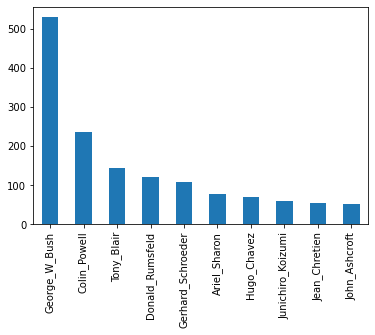

In [17]:
image_paths['name'].value_counts()[:10].plot(kind = "bar")

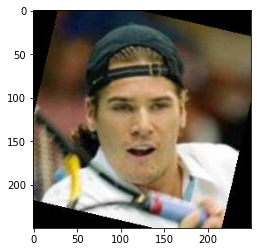

In [34]:
im = Image.open(dataset_path + str(lfw_train.image_path[0]))
plt.imshow(im)

First, we are testing to see whether the images are in category A or B using our model. We can recreate these conditions on a subset of the data, using the samples of George W Bush. The goal of this testing is to identify whether an image is George W Bush or not; we use a random sample of the other images for category B.

In [35]:
# Create a dataset for George W Bush
not_george = image_paths[image_paths.name!="George_W_Bush"].sample(530)
not_george.name = "not_George"
GWB_data = pd.concat([image_paths[image_paths.name=="George_W_Bush"],
                     not_george])

In [36]:
# split into training set, testing set and validation set
bush_train, bush_test = train_test_split(GWB_data, test_size=0.2)
bush_train, bush_val = train_test_split(bush_train,test_size=0.2)

In [40]:
# define a custom function to move images to a new train/test/val directory

def directory_mover(data,dir_name):
    co = 0
    for image in data.image_path:
        # create top directory
        if not os.path.exists(os.path.join('C:/Users/Chris/Downloads/lfwDataset/GWB/',dir_name)):
            shutil.os.mkdir(os.path.join('C:/Users/Chris/Downloads/lfwDataset/GWB/',dir_name))
        
        data_type = data[data['image_path'] == image]['name']
        data_type = str(list(data_type)[0])
        if not os.path.exists(os.path.join('C:/Users/Chris/Downloads/lfwDataset/GWB/',dir_name,data_type)):
            shutil.os.mkdir(os.path.join('C:/Users/Chris/Downloads/lfwDataset/GWB/',dir_name,data_type))
        path_from = os.path.join('C:/Users/Chris/Downloads/lfwDataset/lfw-deepfunneled/',image)
        path_to = os.path.join('C:/Users/Chris/Downloads/lfwDataset/GWB/',dir_name,data_type)
        # print(path_to)
        shutil.copy(path_from, path_to)
        # print('Moved {} to {}'.format(image,path_to))
        co += 1
        
    print('Moved {} images to {} folder.'.format(co,dir_name))

In [41]:
# move images:
directory_mover(bush_train,"Bush_train/")
directory_mover(bush_val,"Bush_val/")
directory_mover(bush_test,"Bush_test/")

Moved 678 images to Bush_train/ folder.
Moved 170 images to Bush_val/ folder.
Moved 212 images to Bush_test/ folder.


In [134]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import torchvision
from torchvision import transforms

### Hyper parameters
num_epochs = 2
batchsize = 16
lr = 0.001


TRAIN_DATA_PATH = 'C:/Users/Chris/Downloads/lfwDataset/GWB/Bush_train/'
VAL_DATA_PATH = 'C:/Users/Chris/Downloads/lfwDataset/GWB/Bush_val/'
TEST_DATA_PATH = 'C:/Users/Chris/Downloads/lfwDataset/GWB/Bush_test/'
TRANSFORM_IMG = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(256),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225] )
    ])

train_data = torchvision.datasets.ImageFolder(root=TRAIN_DATA_PATH, transform=TRANSFORM_IMG)
train_data_loader = DataLoader(train_data, batch_size=batchsize, shuffle=True,  num_workers=4)

val_data = torchvision.datasets.ImageFolder(root=VAL_DATA_PATH, transform=TRANSFORM_IMG)
val_data_loader = DataLoader(val_data, batch_size= batchsize, shuffle= False,  num_workers=4)

test_data = torchvision.datasets.ImageFolder(root=TEST_DATA_PATH, transform=TRANSFORM_IMG)
test_data_loader  = DataLoader(test_data, batch_size= batchsize, shuffle=True, num_workers=4) 


In [135]:
total_train_samples = len(train_data)
n_train_iterations = math.ceil(total_train_samples / batchsize)
print(total_train_samples, n_train_iterations)

total_val_samples = len(val_data)
n_val_iterations = math.ceil(total_val_samples / batchsize)
print(total_val_samples, n_val_iterations)


678 43
170 11


In [137]:
# Implementation of CNN/ConvNet Model
class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        # L1 ImgIn shape=(?, 256, 256, 3)
        # Conv -> (?, 256, 256, 32)
        # Pool -> (?, 128, 128, 32)
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
            
        # L2 ImgIn shape=(?, 128, 128, 32)
        # Conv      ->(?, 128, 128, 64)
        # Pool      ->(?, 64, 64, 64)
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
            
        # L3 ImgIn shape=(?, 64, 64, 64)
        # Conv ->(?, 64, 64, 128)
        # Pool ->(?,32, 32, 128)
        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=1))
            
        # L4 FC 32x32x128 inputs -> 625 outputs
        self.fc1 = torch.nn.Linear(33 * 33 * 128, 64, bias=True)
        torch.nn.init.xavier_uniform_(self.fc1.weight)
        self.layer4 = torch.nn.Sequential(
            self.fc1,
            torch.nn.ReLU())
            
        # L5 Final FC 64 inputs -> 2 outputs
        self.fc2 = torch.nn.Linear(64, 2, bias=True)
            
        #torch.nn.init.normal_(self.fc2, mean=0.0, std= 0.5)
        torch.nn.init.xavier_uniform_(self.fc2.weight) # initialize parameters
        

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.size(0), -1)   # Flatten them for FC
        out = self.fc1(out)
        out = self.fc2(out)
        return out


#instantiate CNN model
model = CNN()
model

CNN(
  (layer1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=139392, out_features=64, bias=True)
  (layer4): Sequential(
    (0): Linear(in_features=139392, out_features=64, bias=True)
    (1): ReLU()
  )
  (fc2): Linear(in_features=64, out_features=2, bias=True)
)

In [139]:
# Loss and Optimizer
CEL = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn.parameters(), lr=lr)

# Train the Model
for epoch in range(num_epochs):
    
    print(f'Training-epoch:{epoch} is processing')
    for i, batch in enumerate(train_data_loader):
        images, labels = batch
        optimizer.zero_grad()
        outputs = model(images)
        loss = CEL(outputs,labels)
        if (i+1) % 5 == 0:
            print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_train_iterations}, inputs: {images.shape}')
            print("loss", loss.item(), '\n')
        loss.backward()
        optimizer.step()
    with torch.no_grad():
        print(f'Val-epoch:{epoch} is processing')
        for i, batch in enumerate(val_data_loader):
            images, labels = batch
            optimizer.zero_grad()
            outputs = model(images)
            loss = CEL(outputs, labels)
            if (i+1) % 5 == 0:
                print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_val_iterations}, inputs: {images.shape}')
                print("val-loss", loss.item(), '\n')
                

# Test the Model
cnn.eval()  # Change model to 'eval' mode (BN uses moving mean/var)
correct = 0
total = 0
for images, labels in test_data_loader:
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
print('Test Accuracy of the model on test images: %.4f%%' % (100.0*correct/total))



Training-epoch:0 is processing
epoch 1/2, step 5/43, inputs: torch.Size([16, 3, 256, 256])
loss 0.6665401458740234 

epoch 1/2, step 10/43, inputs: torch.Size([16, 3, 256, 256])
loss 0.6915909647941589 

epoch 1/2, step 15/43, inputs: torch.Size([16, 3, 256, 256])
loss 0.6330296397209167 

epoch 1/2, step 20/43, inputs: torch.Size([16, 3, 256, 256])
loss 0.6901612281799316 

epoch 1/2, step 25/43, inputs: torch.Size([16, 3, 256, 256])
loss 0.6739391088485718 

epoch 1/2, step 30/43, inputs: torch.Size([16, 3, 256, 256])
loss 0.6614384651184082 

epoch 1/2, step 35/43, inputs: torch.Size([16, 3, 256, 256])
loss 0.6848043203353882 

epoch 1/2, step 40/43, inputs: torch.Size([16, 3, 256, 256])
loss 0.7176257967948914 

Val-epoch:0 is processing
epoch 1/2, step 5/11, inputs: torch.Size([16, 3, 256, 256])
val-loss 0.7649156451225281 

epoch 1/2, step 10/11, inputs: torch.Size([16, 3, 256, 256])
val-loss 0.6205848455429077 

Training-epoch:1 is processing
epoch 2/2, step 5/43, inputs: torch.